<a href="https://colab.research.google.com/github/Bluceli1688/Instagram-likes/blob/main/Environmental_Impact_of_Food_Production_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 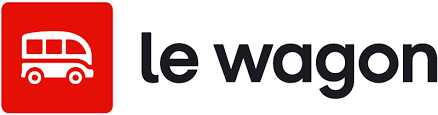

In [1]:
#To connect the notebook to our folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import datetime

import plotly.express as px

### Importing dataset

## Context
In this exercise, you will be working with a dataset that contains information about the ecological impact of a food product. The objective is to gain a deeper understanding of how our food consumption can affect nature.

---
## Importing data

1- Import the data with pandas

2- Download and import Food_Production.csv to colab

### Dataset Exploration

Let's explore the data

3- How many lines and columns the dataset has? Use the .shape method.

In [6]:
file_path = "Food_Production.csv"
df = pd.read_csv(file_path)

print("The dataset has", df.shape[0],"rows and",df.shape[1],"columns.")

The dataset has 43 rows and 23 columns.


4- Use the .info() method to get summary of the columns.

In [7]:
print("summary of the dataset:")
df.info()

summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                            

**5- What information we can find about the dataset?**

In the dataset, we can find a variety of information about how our food consumption can impact nature. This includes data on factors such as the water requirements for producing one kilogram of a specific food type. This information is valuable for comparing different foods.

However, it's worth noting that there are some Null values present in our dataset. These missing values will need to be addressed during the feature engineering process.

6- Use .describe() method to get statical summary of the columns

In [8]:
print("Statistical summary of the dataset:")
print(df.describe())

Statistical summary of the dataset:
       Land use change  Animal Feed       Farm  Processing  Transport  \
count        43.000000    43.000000  43.000000   43.000000  43.000000   
mean          1.260465     0.453488   3.469767    0.253488   0.195349   
std           3.357730     0.919200   7.083264    0.372475   0.158795   
min          -2.100000     0.000000   0.100000    0.000000   0.000000   
25%           0.000000     0.000000   0.350000    0.000000   0.100000   
50%           0.200000     0.000000   0.800000    0.100000   0.100000   
75%           0.800000     0.000000   2.200000    0.300000   0.200000   
max          16.300000     2.900000  39.400000    1.300000   0.800000   

        Packging     Retail  Total_emissions  \
count  43.000000  43.000000        43.000000   
mean    0.269767   0.069767         5.972093   
std     0.342633   0.110270        10.501753   
min     0.000000   0.000000         0.200000   
25%     0.100000   0.000000         0.850000   
50%     0.100000  

**7- What are the first observations we can make about it? (missing values, NaNs, nulls, type)**


8- What are the names of the columns of the dataset?

**Do you think something should be done about it?**

The column names in the dataset exhibit inconsistencies, such as the usage of underscores, spaces, missing letters, and excessively long names. It would be beneficial to standardize and normalize the column names to ensure consistency and improve readability.

### Feature Engineering

Now that we have explored the dataset we are going to clean it up so we can work with it!

##### 9- Missing values

To replace the missing values, we can proceed with the following choices:

*   Note our discoveries and determine if we can have NaN values in the dataset
*   Replace missing values with a specific value or simply delete them
*   Use wisely the missing data to have as much information as possible


In our case, if we decided to delete all the rows that contains NaN value we'll lose too much information in our dataset. **Instead we'll keep all our information and make sure that we only gives non NaN values to our Data Vizualisation.**

Let's see how! Our goal is to only keep the rows that have no NaN values in the column "TestColumn". To do so, we'll simply select the rows without NaN value by using a mask like this :

```
dataset_to_use_in_viz = dataset[~np.isnan(dataset["TestColumn"])]
```
And now we can use dataset_to_use_in_viz freely!


In [14]:
import pandas as pd
import numpy as np

dataset_to_use_in_viz = df[~df[['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',\
                               'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',\
                               'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',\
                               'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',\
                               'Freshwater withdrawals per 100g protein (liters per 100g protein)',\
                               'Freshwater withdrawals per kilogram (liters per kilogram)',\
                               'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',\
                               'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',\
                               'Land use per 1000kcal (m² per 1000kcal)',\
                               'Land use per kilogram (m² per kilogram)',\
                               'Land use per 100g protein (m² per 100g protein)',\
                               'Scarcity-weighted water use per kilogram (liters per kilogram)',\
                               'Scarcity-weighted water use per 100g protein (liters per 100g protein)',\
                               'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)'\
]].isna().any(axis=1)]

print(dataset_to_use_in_viz)





         Food product  Land use change  Animal Feed  Farm  Processing  \
3             Oatmeal              0.0          0.0   1.4         0.0   
4                Rice              0.0          0.0   3.6         0.1   
5            Potatoes              0.0          0.0   0.2         0.0   
11               Nuts             -2.1          0.0   2.1         0.0   
12         Groundnuts              0.4          0.0   1.4         0.4   
20           Tomatoes              0.4          0.0   0.7         0.0   
21     Onions & Leeks              0.0          0.0   0.2         0.0   
22    Root Vegetables              0.0          0.0   0.2         0.0   
23          Brassicas              0.0          0.0   0.3         0.0   
25       Citrus Fruit             -0.1          0.0   0.3         0.0   
26            Bananas              0.0          0.0   0.3         0.1   
27             Apples              0.0          0.0   0.2         0.0   
28   Berries & Grapes              0.0          0.0

##### 10- Negatives Values

Lately, many plantations/activities have been replaced by grasslands, abandoned pastures or just changed.

To replace the negatives values we can proceed with following choices:

*   Note our discoveries and provide scientific evidence regarding why they can be relevant
*   Replace all negative values with a chosen value, or delete them

To find out which are the negative values that belong to the numeric types we are going to use the method `select_dtypes`, which allows us to select only the data that belongs to the type we specify. For more information use this [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

**11- Write a code that will give you the number of negative values in the dataset.**

In [15]:
negative_values_count = (df.select_dtypes(include=['float64'])<0).sum().sum()
print(negative_values_count)

4


**12- In which dataset are these negative value ?**

In [18]:
columns_with_negatives = df.select_dtypes(include=['float64']).columns[(df.select_dtypes(include=['float64'])<0).any()]
print(columns_with_negatives)

Index(['Land use change'], dtype='object')


**13- Replace the negative values with 0 and make sure that you do not have any negative values anymore.**

In [19]:
df_cleaned = df.copy()
df_cleaned[df_cleaned.select_dtypes(include=['float64'])<0] = 0
print(df_cleaned)

           Food product  Land use change  Animal Feed  Farm  Processing  \
0   Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1          Maize (Meal)              0.3          0.0   0.5         0.1   
2         Barley (Beer)              0.0          0.0   0.2         0.1   
3               Oatmeal              0.0          0.0   1.4         0.0   
4                  Rice              0.0          0.0   3.6         0.1   
5              Potatoes              0.0          0.0   0.2         0.0   
6               Cassava              0.6          0.0   0.2         0.0   
7            Cane Sugar              1.2          0.0   0.5         0.0   
8            Beet Sugar              0.0          0.0   0.5         0.2   
9          Other Pulses              0.0          0.0   1.1         0.0   
10                 Peas              0.0          0.0   0.7         0.0   
11                 Nuts              0.0          0.0   2.1         0.0   
12           Groundnuts  

The column names in the dataset are quite inconsistent (some use underscores, other spaces, there are letters missing, etc.) and some columns have long names.

14- Rename all the columns with n uniform format. To do that, check the columns actual names by using the method `.columns` and then rename them by using `.rename()`


In [35]:
import re
df_cleaned = df_cleaned.rename(columns=lambda x: re.sub(r'[\s_]+', '_', x.strip()).lower())
print(df_cleaned.columns)

Index(['foodproduct', 'landusechange', 'animalfeed', 'farm', 'processing',
       'transport', 'packging', 'retail', 'total_emissions',
       'eutrophyingemissionsper1000kcalgpo₄eqper1000kcal',
       'eutrophyingemissionsperkilogramgpo₄eqperkilogram',
       'eutrophyingemissionsper100gproteingpo₄eqper100gramsprotein',
       'freshwaterwithdrawalsper1000kcallitersper1000kcal',
       'freshwaterwithdrawalsper100gproteinlitersper100gprotein',
       'freshwaterwithdrawalsperkilogramlitersperkilogram',
       'greenhousegasemissionsper1000kcalkgco₂eqper1000kcal',
       'greenhousegasemissionsper100gproteinkgco₂eqper100gprotein',
       'landuseper1000kcalm²per1000kcal', 'landuseperkilogramm²perkilogram',
       'landuseper100gproteinm²per100gprotein',
       'scarcity-weightedwateruseperkilogramlitersperkilogram',
       'scarcity-weightedwateruseper100gproteinlitersper100gprotein',
       'scarcity-weightedwateruseper1000kcallitersper1000kilocalories'],
      dtype='object')


#### Data Transformation

##### **Create a "Category" column to cluster the different types of food products**

**14- Given the following lists, write some code that will assign the correct category to each products.**



```
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
```



In [37]:
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]

def assign_category(product):
    if product in Grains:
        return "Grains"
    elif product in Nuts:
        return "Nuts"
    elif product in Vegetables:
        return "Vegetables"
    elif product in Fruits:
        return "Fruits"
    elif product in Sugars:
        return "Sugars"
    elif product in Oils:
        return "Oils"
    elif product in Dairy:
        return "Dairy"
    elif product in Animal_Prod:
        return "Animal Products"
    elif product in Other:
        return "Other"
    else:
        return "Unknown"

# 应用函数创建新的 Category 列
df_cleaned['Category'] = df_cleaned['foodproduct'].apply(assign_category)


**15- Check how many values you have for each category.**

In [38]:
category_counts = df_cleaned['Category'].value_counts()
print(category_counts)

Category
Vegetables         9
Animal Products    8
Grains             5
Oils               5
Fruits             5
Other              4
Dairy              3
Sugars             2
Nuts               2
Name: count, dtype: int64


### Data Visualization

#### Greenhouse emissions

**16- Plot the Average Total emission by category using scatter plot**

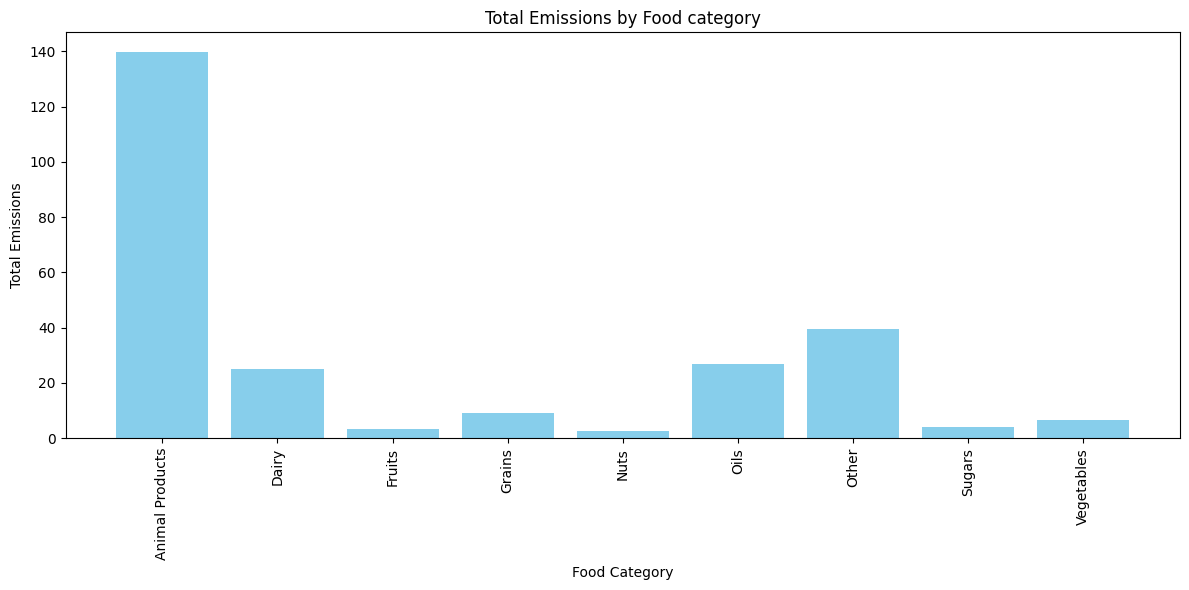

In [39]:
import matplotlib.pyplot as plt

total_emissions_by_category = df_cleaned.groupby('Category')['total_emissions'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(total_emissions_by_category['Category'], total_emissions_by_category['total_emissions'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Food Category")
plt.ylabel("Total Emissions")
plt.title("Total Emissions by Food category")
plt.tight_layout()
plt.show()


#### Total emissions by food product

**17- Plot the Total emission by food product using a bar plot**


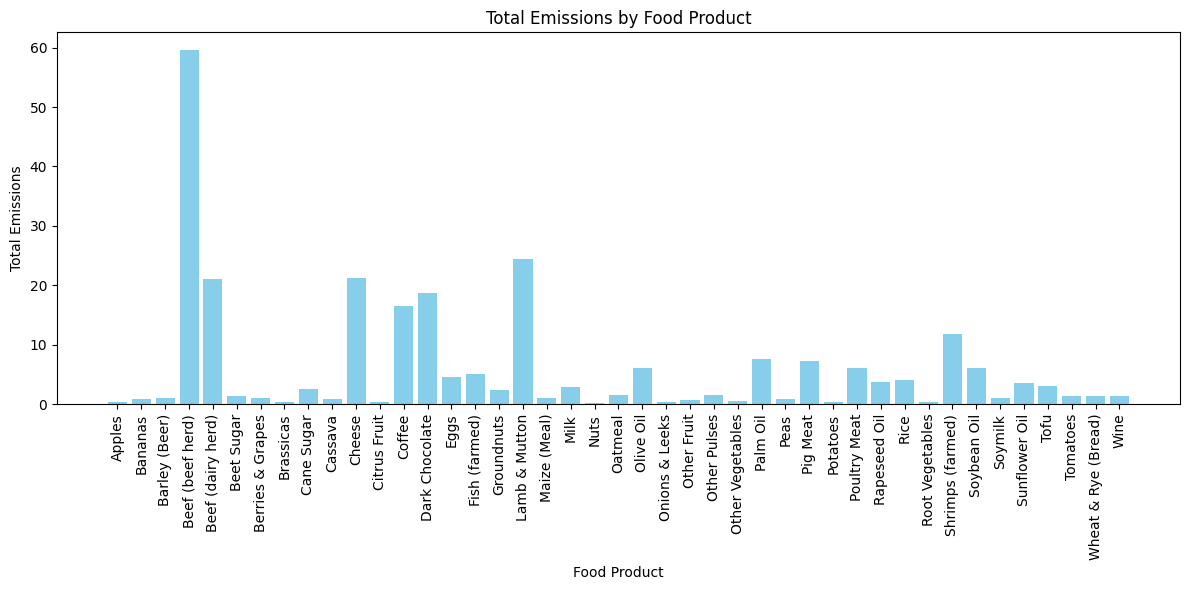

In [42]:
import matplotlib.pyplot as plt

total_emissions_by_food = df_cleaned.groupby('foodproduct')['total_emissions'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(total_emissions_by_food['foodproduct'], total_emissions_by_food['total_emissions'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Food Product")
plt.ylabel("Total Emissions")
plt.title("Total Emissions by Food Product")
plt.tight_layout()
plt.show()


**18- Which types of food have more negative impact on the environment? What conclusions can youd draw?**


In [ ]:
# Beef obviously have more negative impact on the environment

#### Total emissions by product category

**19- Plot the SUM of Total emission by Category using a bar plot**



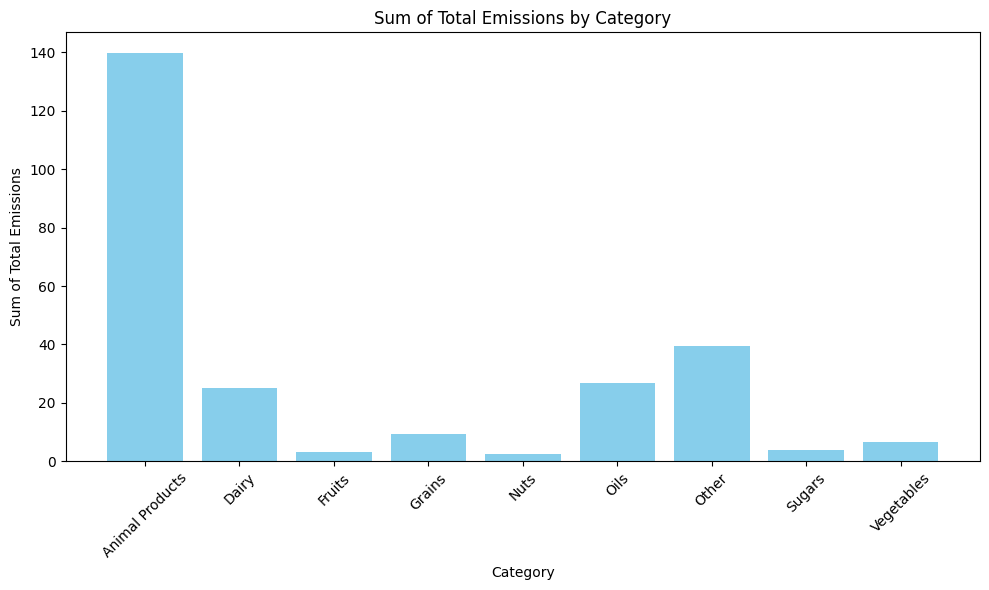

In [43]:
import matplotlib.pyplot as plt

# 分组计算每个类别的总排放量
total_emission_by_category = df_cleaned.groupby('Category')['total_emissions'].sum().reset_index()

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(total_emission_by_category['Category'], total_emission_by_category['total_emissions'], color='skyblue')
plt.xticks(rotation=45)  # 旋转X轴标签，防止重叠
plt.xlabel("Category")
plt.ylabel("Sum of Total Emissions")
plt.title("Sum of Total Emissions by Category")
plt.tight_layout()
plt.show()


**20- Plot the SUM of Total emission by Category using a pie chart**


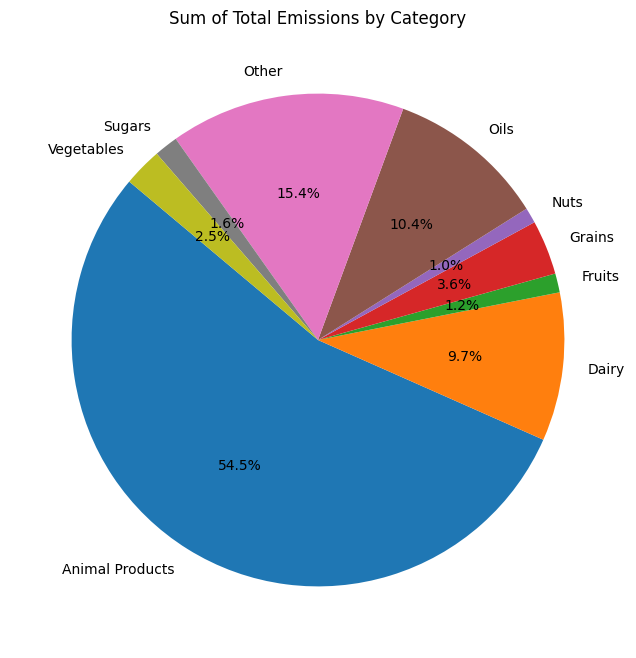

In [44]:
import matplotlib.pyplot as plt

# 分组计算每个类别的总排放量
total_emission_by_category = df_cleaned.groupby('Category')['total_emissions'].sum()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(total_emission_by_category, labels=total_emission_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title("Sum of Total Emissions by Category")
plt.show()


#### 21- Which stage of food production contributes more to greenhouse gas emission?

**22- Plot the Total emission by supply chain using a bar chart**

Stages of supply chain:
1. Land usage
2. Farm
3. Animal Feed
4. Processing
5. Transport
6. Retail
7. Packaging

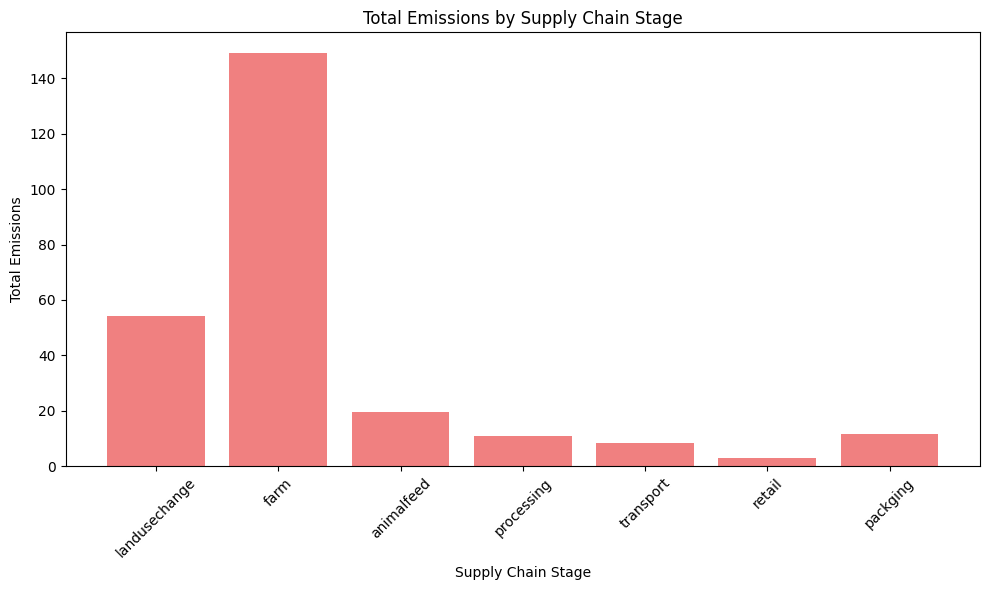

In [47]:
import matplotlib.pyplot as plt

# 定义供应链各阶段的列名（根据题目中给出的字段）
supply_chain_stages = ['landusechange','farm','animalfeed','processing','transport','retail','packging']

# 计算每个阶段的总排放量
total_emission_by_stage = df_cleaned[supply_chain_stages].sum()

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(total_emission_by_stage.index, total_emission_by_stage.values, color='lightcoral')
plt.xticks(rotation=45)  # 旋转X轴标签以防重叠
plt.xlabel("Supply Chain Stage")
plt.ylabel("Total Emissions")
plt.title("Total Emissions by Supply Chain Stage")
plt.tight_layout()
plt.show()


**23- Plot the Total emissions by Food Product using a bar plot. Add the Supply chain as color.**


**24- Plot the Total emissions by Food Product using a bar plot. Add the Category as color.**

**25- How can we promote sustainable and nutritious food production?**



**26- Plot a bar chart that displays the land used to produce 1 Kg of Food**

Be careful here! You might face some issues while working with NaN values. Make sure to follow the steps explained earlier!

**27- Plot a bar chart that displays the land used to produce 1000kcal for every food product**


**28- Plot a bar chart that displays the water used to produce 1000kcal for every food product**


**29- Plot a bar chart that displays the water used to produce 1Kg for every food product**

#### Heatmap to check the relation among different attributes of foods

### Conclusion

**30- What can be the strategy to reduce greenhouse gas emissions regarding our food consumption?**


